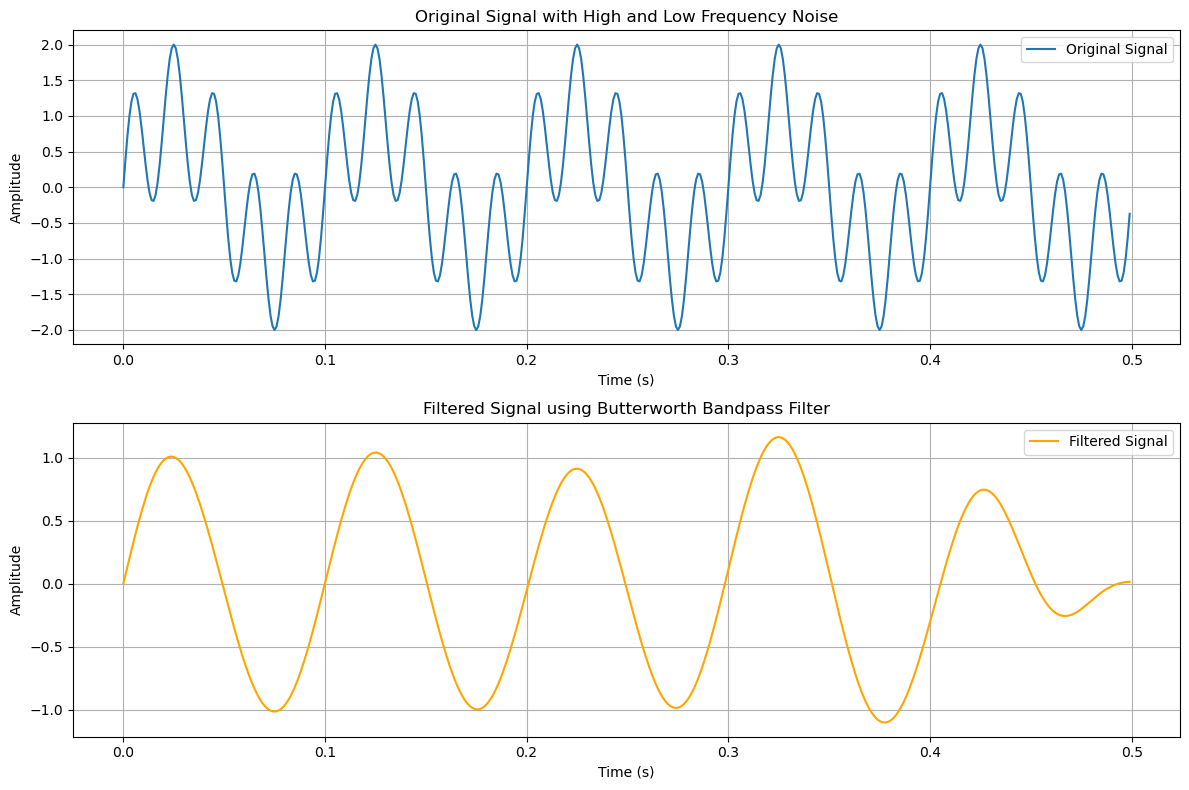

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def generate_dummy_signal(fs=1000, duration=1, f_high=50, f_low=10):
    t = np.arange(0, duration, 1/fs)  # Time vector
    high_freq_noise = np.sin(2 * np.pi * f_high * t)  # Generate high frequency noise
    low_freq_noise = np.sin(2 * np.pi * f_low * t)  # Generate low frequency noise
    dummy_signal = high_freq_noise + low_freq_noise  # Combine high and low frequency noise
    return t, dummy_signal

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Generate dummy signal
fs = 1000  # Sampling frequency
duration = .5  # Duration of the signal in seconds
f_high = 50  # Frequency of high frequency noise
f_low = 10  # Frequency of low frequency noise
t, dummy_signal = generate_dummy_signal(fs, duration, f_high, f_low)

# Apply Butterworth filter
lowcut = 5  # Low cutoff frequency of the filter
highcut = 20  # High cutoff frequency of the filter
filtered_signal = butter_bandpass_filter(dummy_signal, lowcut, highcut, fs)

# Plot the original and filtered signals
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, dummy_signal, label='Original Signal')
plt.title('Original Signal with High and Low Frequency Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Filtered Signal', color='orange')
plt.title('Filtered Signal using Butterworth Bandpass Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()